In [1]:
from DroneEnv import DroneLandingEnv
from PIDCon import PIDController
from PID_run import run_pid_simulation

error [-2. -2. -2. -2.]
theta_pid 2.0
theta 2.0
for theta 2.0 R is [[-0.41614681  0.90929741  0.        ]
 [-0.90929741 -0.41614681  0.        ]
 [ 0.          0.          1.        ]]
action [-1.9972599  5.3680491 -0.2        0.       ]
theta_env 2.0
for theta 2.0 R.T is [[-0.41614681 -0.90929741  0.        ]
 [ 0.90929741 -0.41614681  0.        ]
 [ 0.          0.          1.        ]]
action_world [-0.70667606 -0.70667606 -0.03489759  0.        ]
error [-1.92933238 -1.92933238 -1.99651027 -2.        ]
action [-1.9972599  5.3680491 -0.2        0.       ]
theta_env 2.0
for theta 2.0 R.T is [[-0.41614684 -0.90929743  0.        ]
 [ 0.90929743 -0.41614684  0.        ]
 [ 0.          0.          1.        ]]
action_world [-0.70667607 -0.70667609 -0.03489759  0.        ]
error [-1.85866477 -1.85866477 -1.99302051 -2.        ]
action [-1.9972599  5.3680491 -0.2        0.       ]
theta_env 2.0
for theta 2.0 R.T is [[-0.41614684 -0.90929743  0.        ]
 [ 0.90929743 -0.41614684  0.        ]

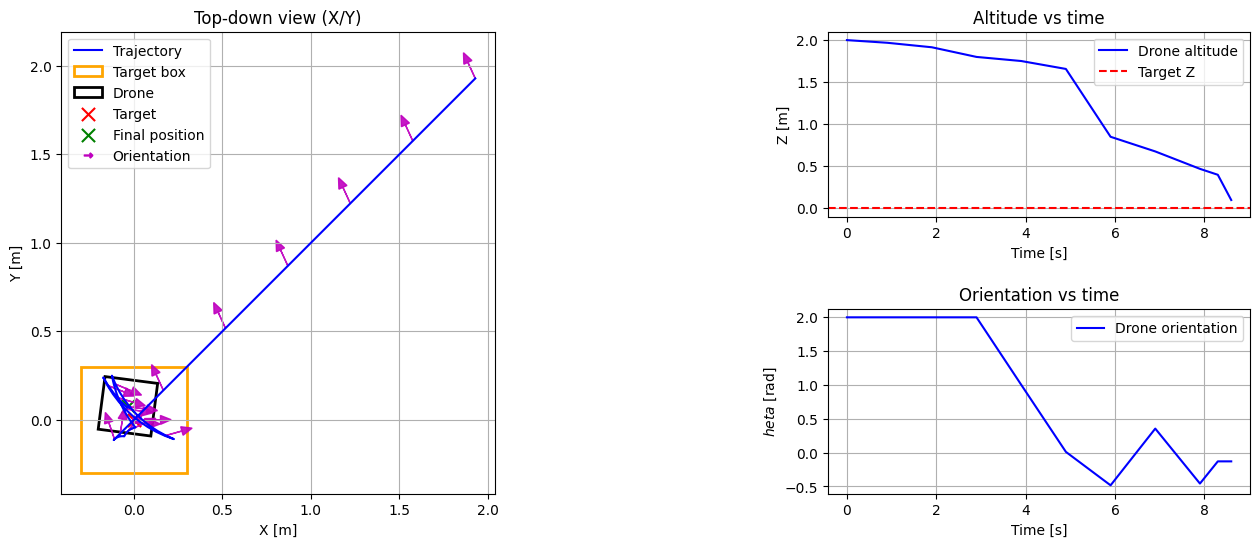

In [2]:
sim_dt = 0.1         # simulation step (10 Hz)
env = DroneLandingEnv(render_mode=None, dt=sim_dt)
controller_dt = 1.0  # controller step (1 Hz)

pid = PIDController(Kp=[2.0,2.0,2.0, 2.0], Ki=[0.1,0.1,0.0,0.2], Kd=[0.0,0.0,0.0,0.0], dt=controller_dt, integral_limit=0.5, z_fixed_speed= -0.2, yaw_2_steps =True)

states, target = run_pid_simulation(env = env, pid = pid, init_mode='fixed', plot=True, init_pos = [2.0,2.0,2.0, 2.0], verbose=True)

In [5]:
import numpy as np
R= np.array([[-0.41614681 , 0.90929741 , 0.        ],
 [-0.90929741, -0.41614681 , 0.        ],
 [ 0.       ,   0.      ,    1.        ]])

In [6]:
R

array([[-0.41614681,  0.90929741,  0.        ],
       [-0.90929741, -0.41614681,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [8]:
R.T@R

array([[0.99999995, 0.        , 0.        ],
       [0.        , 0.99999995, 0.        ],
       [0.        , 0.        , 1.        ]])

In [9]:
error = np.array([-2., -2., -2., -2.])

In [10]:
error

array([-2., -2., -2., -2.])

In [18]:
theta = 2.0

In [24]:
print(error)
c, s = np.cos(theta), np.sin(theta)
R = np.array([
  [c, s, 0],
  [-s, c, 0],
  [0, 0, 1]
])  # world-to-body rotation (transpose of body-to-world)

print(R)

body_output = np.zeros_like(error)
body_output[:3] = R @ error[:3]   # rotate linear part
body_output[3] = error[3]         # yaw rate unchanged

print(body_output )

[-2. -2. -2. -2.]
[[-0.41614684  0.90929743  0.        ]
 [-0.90929743 -0.41614684  0.        ]
 [ 0.          0.          1.        ]]
[-0.98630118  2.65088853 -2.         -2.        ]


In [22]:
body_output

array([-0.98630118,  2.65088853, -2.        , -2.        ])